In [1]:
import pandas as pd
df = pd.read_csv("data/agaricus-lepiota.data")

df.describe()



,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [2]:
df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='habitat'>

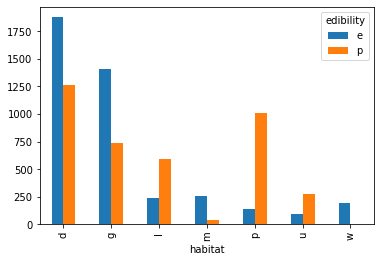

In [64]:
df.sort_values(by=['edibility', 'habitat'])[['edibility', 'habitat']]

a = df.groupby(['habitat', 'edibility']).size()
a = a.unstack()
a.plot.bar()

<AxesSubplot:xlabel='cap-color'>

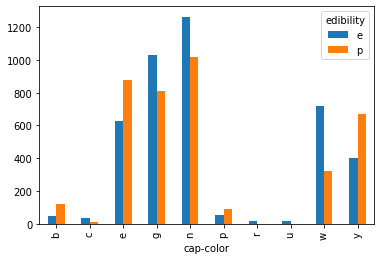

In [30]:
b = df.groupby(['cap-color', 'edibility']).size()
b = b.unstack()
b.plot.bar()

<AxesSubplot:xlabel='odor'>

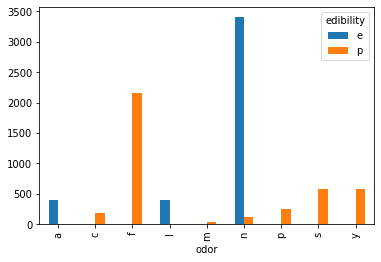

In [31]:
c = df.groupby(['odor', 'edibility']).size()
c = c.unstack()
c.plot.bar()

<AxesSubplot:xlabel='spore-print-color'>

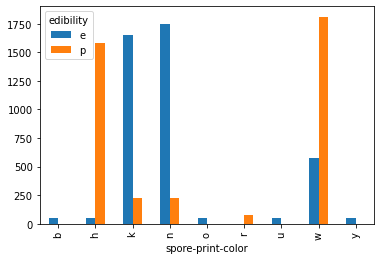

In [72]:
c = df.groupby(['spore-print-color', 'edibility']).size()
c = c.unstack()
c.plot.bar()

In [76]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer()
#vectorizer = CountVectorizer()
df_dc = pd.get_dummies(df, columns=['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

vectors = vectorizer.fit_transform(df_dc)

# Show the shape of the mushroom-features matrix
vectors.shape

(119, 94)

In [77]:
# How sparse is the document-term matrix? (%)
vectors.nnz / float(vectors.shape[0]*vectors.shape[1]) * 100.0

2.4584301805828717

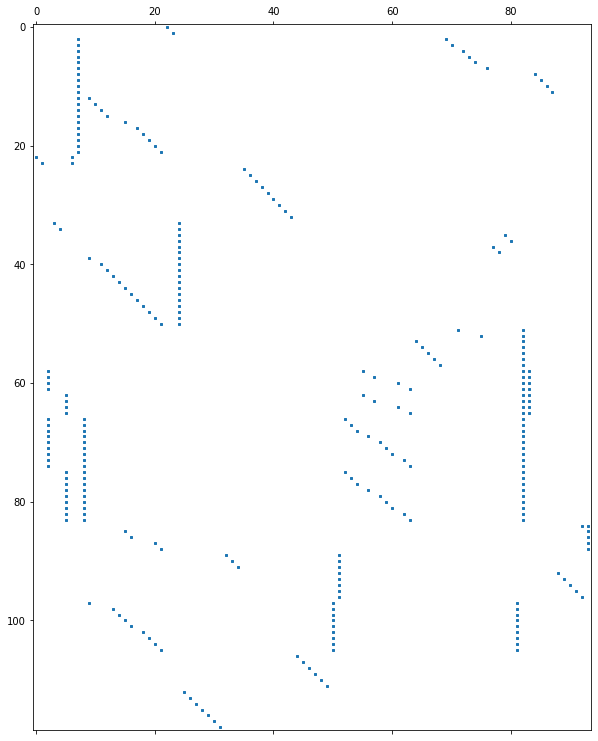

In [78]:
plt.spy(vectors, markersize=2)
fig = plt.gcf()
fig.set_size_inches(10,60)
plt.plot()
plt.show()